In [1]:
# Michael Wasserstein
# Plot_VV_Plan_View.py
# 4/11/2024
# Script takes in WRF outputs and plots a cross section of vertical velocity
# As well as plan view plots at 700 hPa and 800 hPa

####### Usage #########
# Conda environment - py37
# python /uufs/chpc.utah.edu/common/home/u1371671/WRF/Plotting_Scripts/Plot_Mesonet_Bias.py -r 2 -p 2
# -r represents the run number you want to plot
# -p is the wrf path (wrf1 or wrf2)
# -t is the time of interest (YYYYmmddHH)

import os, sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u1371671/')
#from map_script import *

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import (NullFormatter, ScalarFormatter)
import matplotlib
from matplotlib.colors import from_levels_and_colors, ListedColormap, LinearSegmentedColormap
import cartopy
import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles
import cartopy.feature as cfeature
from cartopy import crs
from cartopy.feature import NaturalEarthFeature, COLORS
import pyart
import metpy.calc as mpcalc
from metpy.units import units
import math
from metpy.plots import USCOUNTIES


import numpy as np
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair,ALL_TIMES)
import wrf
import glob
import pandas as pd
import datetime

import urllib.request as req
import os.path
import json
import urllib
import cmath

from scipy.ndimage import gaussian_filter

from herbie import Herbie


# ######## User input arguments #############
# import argparse
# parser = argparse.ArgumentParser()

# parser.add_argument("-r", "--run", help="WRF run of interest")
# parser.add_argument("-p", "--path", help="Wrf path - where is data (1 or 2")


# args = parser.parse_args()


###########################
##### stuff for WRF  ######
###########################
# Get user inputs
run = '12'
path = 12
print('Plotting data for run', run,)

run_number = '{}'.format(run).zfill(2)

def get_angle(x1,y1,x2,y2):
    return math.degrees(math.atan2(y2-y1, x2-x1))


if (path == 2) or (path == 6) or (path == 12): #TECPEC
    time_of_interest_list = pd.date_range(datetime.datetime(2019,3,22,12), datetime.datetime(2019,3,23,6), freq = '1H')
if (path == 1) or (path == 5) or (path == 8) or (path == 9):
    #time_of_interest_list = pd.date_range(datetime.datetime(2022,12,12,0), datetime.datetime(2022,12,15,0), freq = '1H')
    time_of_interest_list = pd.date_range(datetime.datetime(2022,12,13,0), datetime.datetime(2022,12,14,6), freq = '1H')
run_number = '{}'.format(run).zfill(2)

# Base paths
base = '/uufs/chpc.utah.edu/common/home/'
home = base + 'u1371671/'
# paths for data
if path ==1:
    base_path = base + 'steenburgh-group12/michael/wrf/'
else:
    base_path = base + 'steenburgh-group12/michael/wrf{}/'.format(path)
WRF_path = base_path + 'wrf_runs/wrf_{}/run/'.format(run_number)
WPS_path = base_path + 'WPS/'

# paths for saving fig
Fig_dir = home + 'WRF/Figures_{}/wrf_{}/2_Panel_HRRR_2_Domain_Temp_Wind/'.format(path,run_number)

if os.path.exists(Fig_dir) == False:
    os.mkdir(Fig_dir)
    
# load in all the wrf output data files
data_files_d04 = glob.glob(WRF_path  + '*wrfout_d04*') # for the outermost domain
data_files_d04.sort()

# load in all the wrf output data files
data_files_d03 = glob.glob(WRF_path  + '*wrfout_d03*') # for the outermost domain
data_files_d03.sort()

# load in all the wrf output data files
data_files_d02 = glob.glob(WRF_path  + '*wrfout_d02*') # for the outermost domain
data_files_d02.sort()


# Levels and colormap for plotting
T_levels = np.array([0.25,0.5,1.25,2.5,6.25,13,25,50])
T_levels = np.arange(-8,2.1,0.25)

cmap = plt.get_cmap('pyart_HomeyerRainbow')

colors = []
for v in np.linspace(0,1,len(T_levels)):
    colors.append(cmap(v))
    

# list of files for each domain
data_files_d02 = data_files_d02
data_files_d03 = data_files_d03[::4] # Every 4 to only get the hourly data
data_files_d04 = data_files_d04[::4] # Every 4 to only get the hourly data

/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

Plotting data for run 12


/scratch/local/u1371671/1835247/ipykernel_1419382/478607166.py:86: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_of_interest_list = pd.date_range(datetime.datetime(2019,3,22,12), datetime.datetime(2019,3,23,6), freq = '1H')


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-22T12:00:00.000000000 2019-03-22T12:00:00.000000000


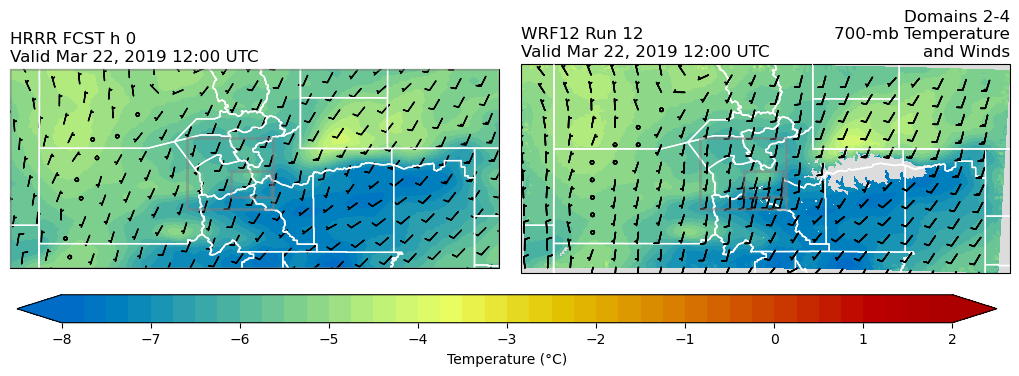

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 13:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
skipping corrupted Message
Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/cfgrib/messages.py", line 273, in itervalues
    yield self.filestream.message_from_file(file, errors=errors)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/cfgrib/messages.py", line 340, in message_from_file
    return Message.from_file(file, offset, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/pyt

Can"t save figure for 1  : 20190322130000
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 14:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


Can"t save figure for 2  : 20190322140000
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 15:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-22T15:00:00.000000000 2019-03-22T15:00:00.000000000


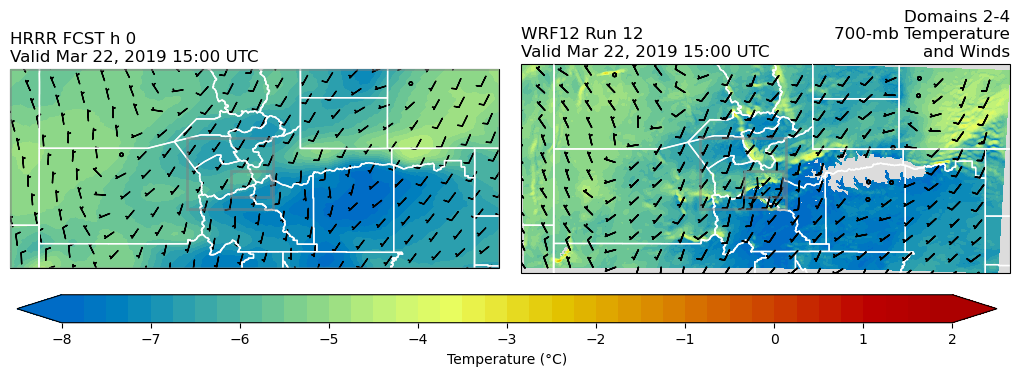

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 16:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


Can"t save figure for 4  : 20190322160000
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 17:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
skipping corrupted Message
Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/cfgrib/messages.py", line 273, in itervalues
    yield self.filestream.message_from_file(file, errors=errors)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/cfgrib/messages.py", line 340, in message_from_file
    return Message.from_file(file, offset, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/pyt

Can"t save figure for 5  : 20190322170000
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 18:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


Can"t save figure for 6  : 20190322180000
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 19:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-22T19:00:00.000000000 2019-03-22T19:00:00.000000000


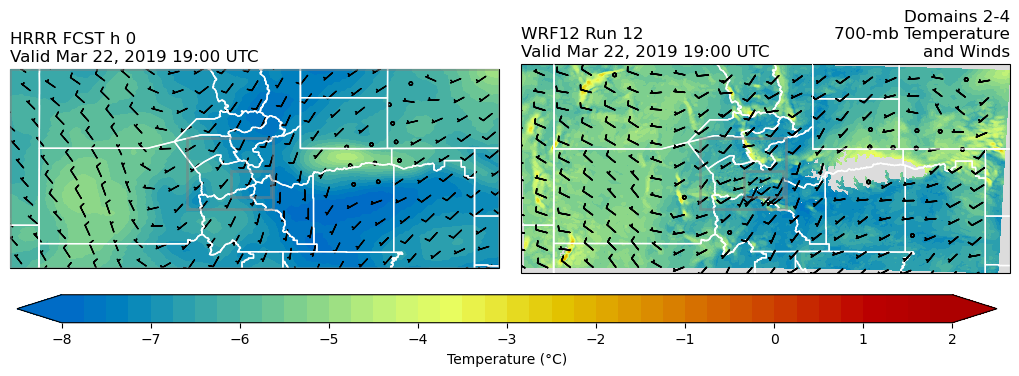

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 20:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
skipping corrupted Message
Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/cfgrib/messages.py", line 273, in itervalues
    yield self.filestream.message_from_file(file, errors=errors)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/python3.11/site-packages/cfgrib/messages.py", line 340, in message_from_file
    return Message.from_file(file, offset, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/xesmf_env/lib/pyt

Can"t save figure for 8  : 20190322200000
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 21:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-22T21:00:00.000000000 2019-03-22T21:00:00.000000000


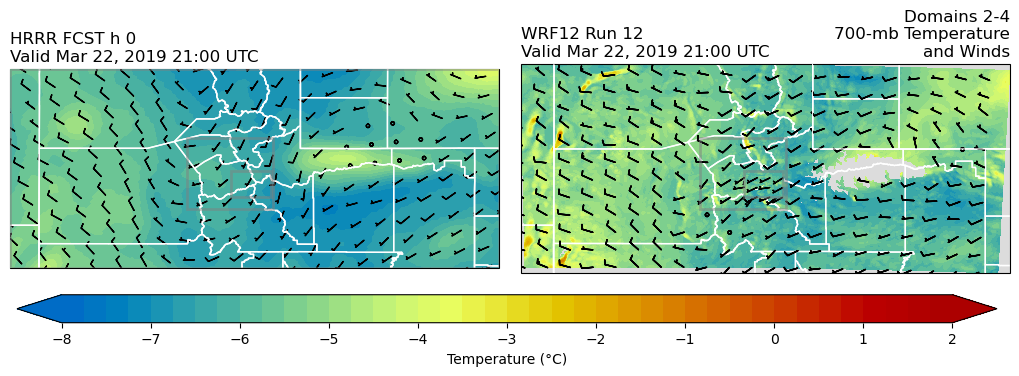

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 22:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-22T22:00:00.000000000 2019-03-22T22:00:00.000000000


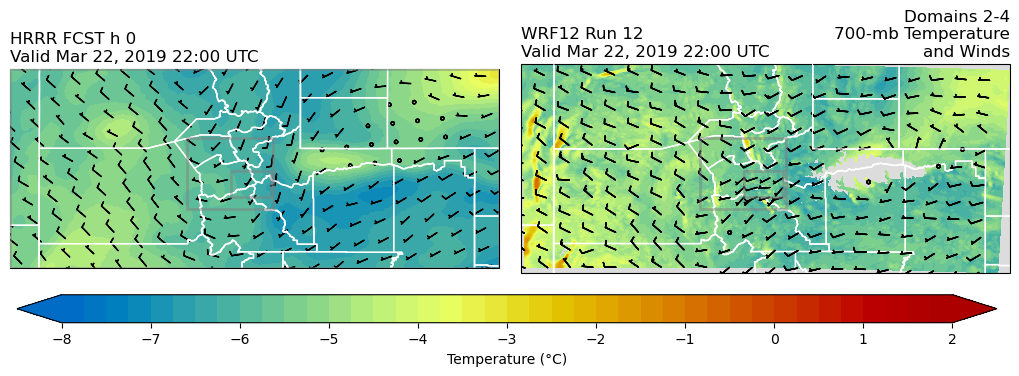

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-22 23:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-22T23:00:00.000000000 2019-03-22T23:00:00.000000000


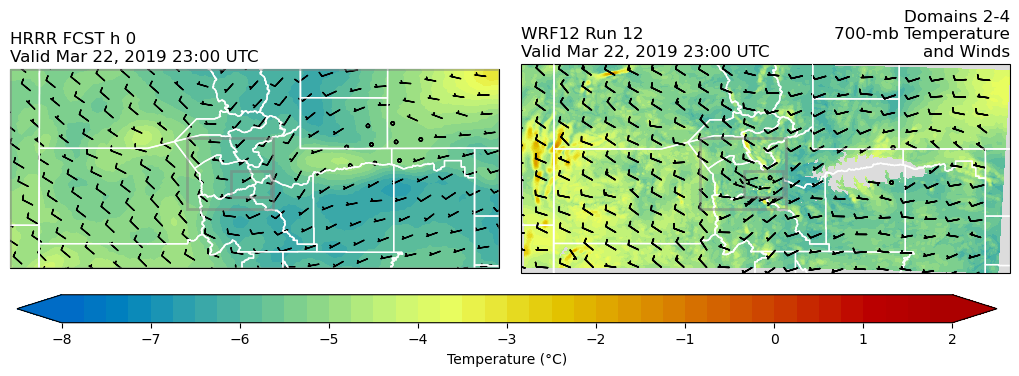

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-23 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-23T00:00:00.000000000 2019-03-23T00:00:00.000000000


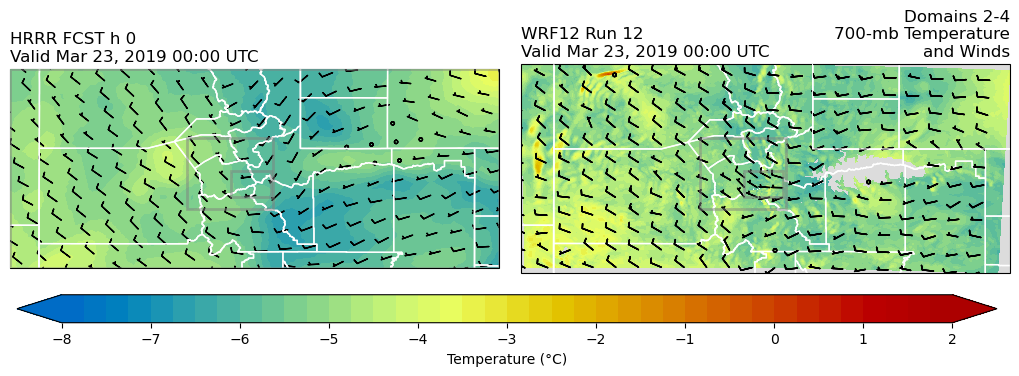

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-23 01:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-23T01:00:00.000000000 2019-03-23T01:00:00.000000000


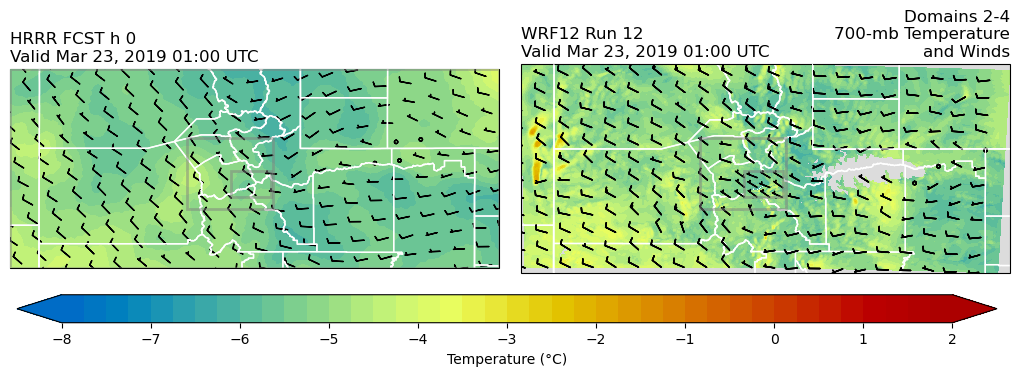

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-23 02:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-23T02:00:00.000000000 2019-03-23T02:00:00.000000000


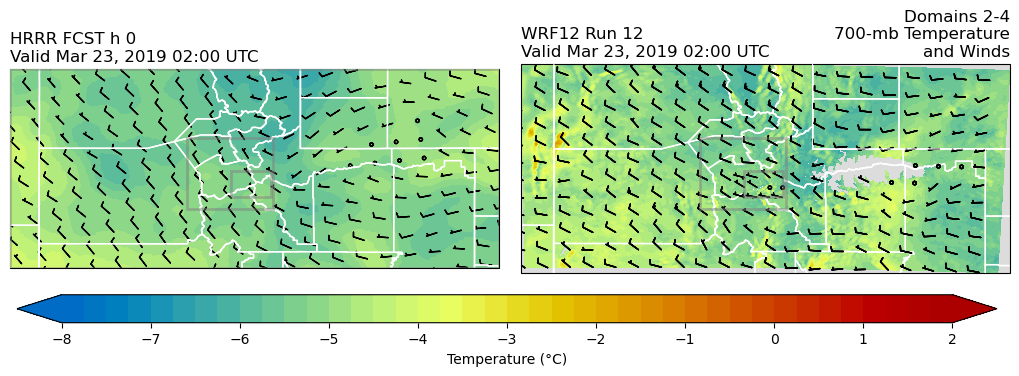

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-23 03:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-23T03:00:00.000000000 2019-03-23T03:00:00.000000000


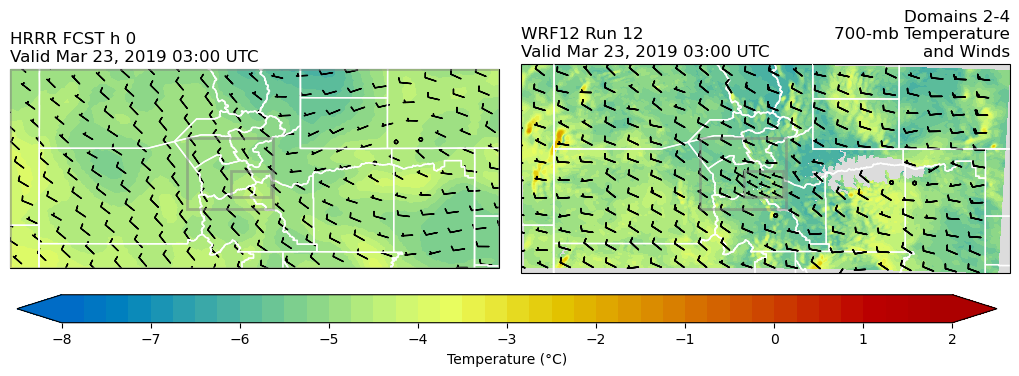

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-23 04:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-23T04:00:00.000000000 2019-03-23T04:00:00.000000000


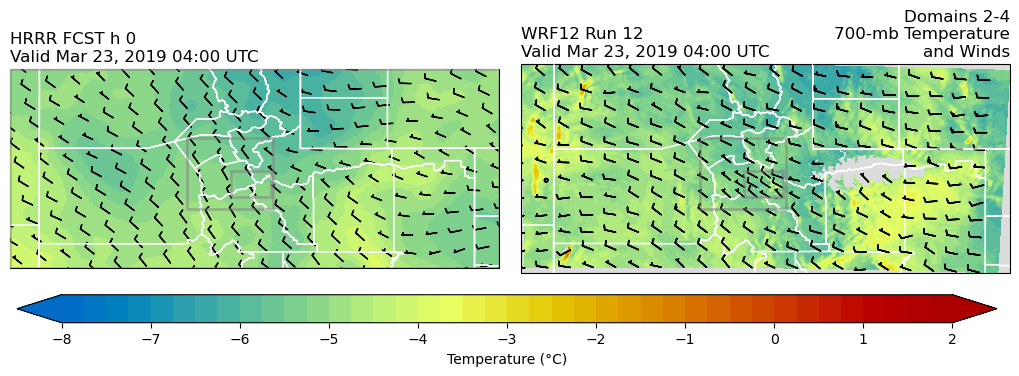

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-23 05:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-23T05:00:00.000000000 2019-03-23T05:00:00.000000000


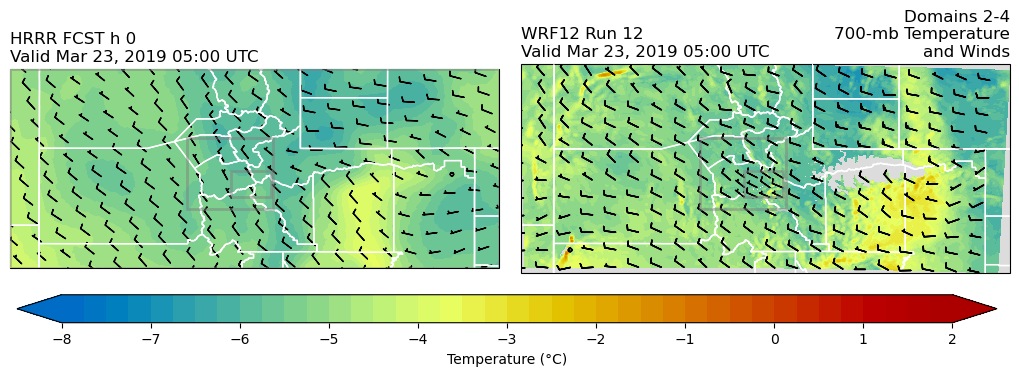

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Mar-23 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2019-03-23T06:00:00.000000000 2019-03-23T06:00:00.000000000


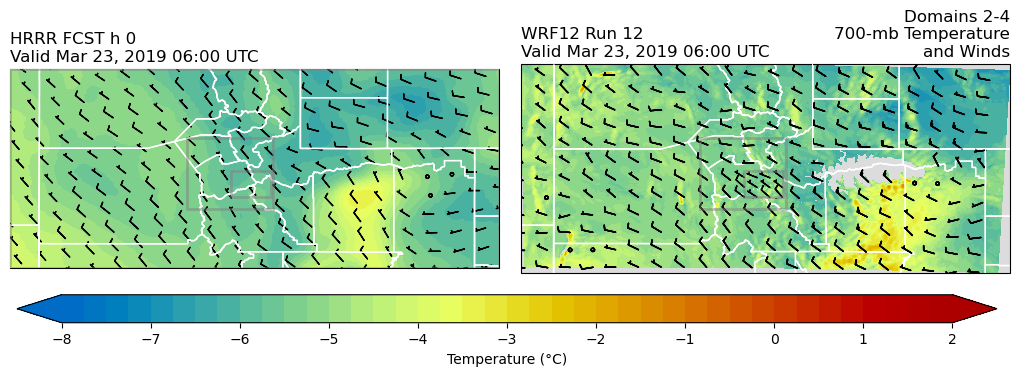

In [2]:
for i, time_of_interest in enumerate(time_of_interest_list[:]):
    try:
        time_of_interest_WRF = time_of_interest.strftime('%Y-%m-%d_%H:%M:%S')
        time_HRRR = time_of_interest.strftime('%Y-%m-%d %H:%M')
        time_of_interest_title = datetime.datetime.strftime(time_of_interest, '%b %-d, %Y %H:%M UTC')
        time_of_interest_save = datetime.datetime.strftime(time_of_interest, '%Y%m%d%H%M%S')
        time_of_intererst_prior = (time_of_interest - datetime.timedelta(hours = 1)).strftime('%Y-%m-%d_%H:%M:%S')



    #     data_files_d04 = [WRF_path + 'wrfout_d04_' + time_of_intererst_prior,
    #                       WRF_path + 'wrfout_d04_' + time_of_interest_WRF]

        # WRF data files
        ds_d02 = Dataset(data_files_d02[i])
        ds_d03 = Dataset(data_files_d03[i])
        ds_d04 = Dataset(data_files_d04[i])

        # Get the WRF variables for each domain
        ########### DOmain 2 ############
        ht_d02 = getvar(ds_d02, "z", timeidx=-1)
        ter_d02 = getvar(ds_d02, "ter", timeidx=-1)
        theta_d02  = wrf.getvar(ds_d02, 'theta', timeidx = -1)
        wa_d02 = getvar(ds_d02, 'wa', timeidx = -1)
        u_d02 =  getvar(ds_d02, "ua", timeidx = -1)
        v_d02 =  getvar(ds_d02, "va",  timeidx = -1)
        lati_d02, long_d02 = latlon_coords(ter_d02)
        p_d02 = getvar(ds_d02, 'pressure',  timeidx = -1)
        tc_d02 = getvar(ds_d02, 'tc',  timeidx = -1)
        ctt_d02 = getvar(ds_d02, 'ctt',  timeidx = -1)
        mdbz_d02 =  getvar(ds_d02, 'mdbz',  timeidx = -1)
        # Stuff for boundaries
        geobounds = wrf.geo_bounds(wrfin=ds_d02)
        bottom_latitude_d02 = geobounds.bottom_left.lat
        left_longitude_d02 = geobounds.bottom_left.lon
        top_latitude_d02 = geobounds.top_right.lat
        right_longitude_d02 = geobounds.top_right.lon

        # Non-cumulus accumulated rain (total grid-scale precipitation)
        rainnc_d02 = wrf.getvar(ds_d02, "RAINNC", timeidx=ALL_TIMES, method="cat")
        accumulated_rainnc_d02 = rainnc_d02.diff(dim = 'Time').values

        # Non-cumulus accumulated rain (should be zero for inner domain, since you have no cumulus parameterization)
        rainc_d02 = wrf.getvar(ds_d02, "RAINC", timeidx=ALL_TIMES, method="cat")
        accumulated_rainc_d02 = rainc_d02.diff(dim = 'Time').values

        # Find total accumulated precip
        accumulated_precip_d02 = (accumulated_rainnc_d02 + accumulated_rainc_d02)[0] # extract the zeroth time index


        ########### DOmain 3 ############
        ht_d03 = getvar(ds_d03, "z", timeidx=-1)
        ter_d03 = getvar(ds_d03, "ter", timeidx=-1)
        theta_d03  = wrf.getvar(ds_d03, 'theta', timeidx = -1)
        wa_d03 = getvar(ds_d03, 'wa', timeidx = -1)
        u_d03 =  getvar(ds_d03, "ua", timeidx = -1)
        v_d03 =  getvar(ds_d03, "va",  timeidx = -1)
        lati_d03, long_d03 = latlon_coords(ter_d03)
        p_d03 = getvar(ds_d03, 'pressure',  timeidx = -1)
        tc_d03 = getvar(ds_d03, 'tc',  timeidx = -1)
        ctt_d03 = getvar(ds_d03, 'ctt',  timeidx = -1)
        mdbz_d03 =  getvar(ds_d03, 'mdbz',  timeidx = -1)
        # Stuff for boundaries
        geobounds = wrf.geo_bounds(wrfin=ds_d03)
        bottom_latitude_d03 = geobounds.bottom_left.lat
        left_longitude_d03 = geobounds.bottom_left.lon
        top_latitude_d03 = geobounds.top_right.lat
        right_longitude_d03 = geobounds.top_right.lon



        # Non-cumulus accumulated rain (total grid-scale precipitation)
        rainnc_d03 = wrf.getvar(ds_d03, "RAINNC", timeidx=ALL_TIMES, method="cat")
        accumulated_rainnc_d03 = rainnc_d03.diff(dim = 'Time').values

        # Non-cumulus accumulated rain (should be zero for inner domain, since you have no cumulus parameterization)
        rainc_d03 = wrf.getvar(ds_d03, "RAINC", timeidx=ALL_TIMES, method="cat")
        accumulated_rainc_d03 = rainc_d03.diff(dim = 'Time').values

        # Find total accumulated precip
        accumulated_precip_d03 = (accumulated_rainnc_d03 + accumulated_rainc_d03)[0] # extract the zeroth time index

        ########### DOmain 4 ############
        ht_d04 = getvar(ds_d04, "z", timeidx=-1)
        ter_d04 = getvar(ds_d04, "ter", timeidx=-1)
        theta_d04  = wrf.getvar(ds_d04, 'theta', timeidx = -1)
        wa_d04 = getvar(ds_d04, 'wa', timeidx = -1)
        u_d04 =  getvar(ds_d04, "ua", timeidx = -1)
        v_d04 =  getvar(ds_d04, "va",  timeidx = -1)
        lati_d04, long_d04 = latlon_coords(ter_d04)
        p_d04 = getvar(ds_d04, 'pressure',  timeidx = -1)
        tc_d04 = getvar(ds_d04, 'tc',  timeidx = -1)
        ctt_d04 = getvar(ds_d04, 'ctt',  timeidx = -1)
        mdbz_d04 =  getvar(ds_d04, 'mdbz',  timeidx = -1)
        #Stuff for boundaries
        geobounds = wrf.geo_bounds(wrfin=ds_d04)
        bottom_latitude_d04 = geobounds.bottom_left.lat
        left_longitude_d04 = geobounds.bottom_left.lon
        top_latitude_d04 = geobounds.top_right.lat
        right_longitude_d04 = geobounds.top_right.lon



        # Non-cumulus accumulated rain (total grid-scale precipitation)
        rainnc_d04 = wrf.getvar(ds_d04, "RAINNC", timeidx=ALL_TIMES, method="cat")
        accumulated_rainnc_d04 = rainnc_d04.diff(dim = 'Time').values

        # Non-cumulus accumulated rain (should be zero for inner domain, since you have no cumulus parameterization)
        rainc_d04 = wrf.getvar(ds_d04, "RAINC", timeidx=ALL_TIMES, method="cat")
        accumulated_rainc_d04 = rainc_d04.diff(dim = 'Time').values

        # Find total accumulated precip
        accumulated_precip_d04 = (accumulated_rainnc_d04 + accumulated_rainc_d04)[0] # extract the zeroth time index



        #################### Interpolate to a level ###################
        level_to_interp = 700 # mbar

        ########### DOmain 2 ############   
        u_lev_d02 = wrf.interplevel(field3d=u_d02, vert=p_d02, desiredlev=level_to_interp,)
        v_lev_d02 = wrf.interplevel(field3d=v_d02, vert=p_d02, desiredlev=level_to_interp,)
        tc_lev_d02 = wrf.interplevel(field3d=tc_d02, vert=p_d02, desiredlev=level_to_interp,)

        ########### DOmain 3 ############   
        u_lev_d03 = wrf.interplevel(field3d=u_d03, vert=p_d03, desiredlev=level_to_interp,)
        v_lev_d03 = wrf.interplevel(field3d=v_d03, vert=p_d03, desiredlev=level_to_interp,)
        tc_lev_d03 = wrf.interplevel(field3d=tc_d03, vert=p_d03, desiredlev=level_to_interp,)

        ########### DOmain 4 ############   
        u_lev_d04 = wrf.interplevel(field3d=u_d04, vert=p_d04, desiredlev=level_to_interp,)
        v_lev_d04 = wrf.interplevel(field3d=v_d04, vert=p_d04, desiredlev=level_to_interp,)
        tc_lev_d04 = wrf.interplevel(field3d=tc_d04, vert=p_d04, desiredlev=level_to_interp,)




        ############################# HRRR ############################
        # Create Herbie object for the HRRR model 6-hr surface forecast product
        H = Herbie(
          time_HRRR,
          model='hrrr',
          product='sfc', # prs or sfc
          fxx=0
        )

        ds_u_v = H.xarray(":[U\|V]GRD:700 mb")
        ds_REFC = H.xarray(":REFC:")
        ds_IR_br = H.xarray(":SBT113:")
        ds_T = H.xarray(":TMP:700 mb")

        print(ds_T.t.time.values, tc_lev_d04.Time.values)

        fig = plt.figure(figsize = (14, 14), facecolor = 'white', edgecolor = 'k',)

        nrows = 20
        ncols = 24

        ############################### ax1 HRRR ################################
        ax1 = plt.subplot2grid((nrows, ncols), (0, 0), rowspan = 20, colspan = 10, projection = ccrs.PlateCarree())

        ax1.set_extent([left_longitude_d02, right_longitude_d02, bottom_latitude_d02, top_latitude_d02], crs=ccrs.PlateCarree())

        # Add the wind barbs, only plotting every 25th data point.
        skip = 8
        ax1.barbs(ds_u_v.longitude.values[::skip,::skip], ds_u_v.latitude.values[::skip,::skip],
              ds_u_v.u.values[::skip,::skip], ds_u_v.v.values[::skip,::skip],
            length=4, zorder=100, color = 'black')

        ax1.contourf(ds_T.longitude, ds_T.latitude, ds_T.t-273.15, transform = ccrs.PlateCarree(),levels = T_levels,
                    colors = colors, zorder = 98, extend = 'both')


        # Plot 700 mbar temperature
    #         ax1.contour(ds_T.longitude, ds_T.latitude, ds_T.t-273.15,transform = ccrs.PlateCarree(),levels = np.arange(2,35,2),
    #                     colors = 'red', linestyle = '-', linewidths = 1)
    #         CS = ax1.contour(ds_T.longitude, ds_T.latitude, ds_T.t-273.15,transform = ccrs.PlateCarree(),levels = np.arange(-40,1,2),
    #                     colors = 'red', linestyle = '--', zorder = 99)
    #         ax1.clabel(CS, CS.levels, inline=True, fontsize=10)


        # Add U.S. state borders
        ax1.add_feature(cfeature.STATES, edgecolor='white', linewidth=0.5, zorder = 100)
        ax1.add_feature(USCOUNTIES.with_scale('500k'), edgecolor = 'white', zorder = 100)

        #ax2.set_title('Domain 2 - $\Delta x = $ 900 m', loc = 'right')
        ax1.set_title('HRRR FCST h 0 \nValid {}'.format( time_of_interest_title), loc = 'left')


        # d02 box
        ax1.add_patch(matplotlib.patches.Rectangle((left_longitude_d02, bottom_latitude_d02), right_longitude_d02-left_longitude_d02, top_latitude_d02-bottom_latitude_d02,
                 fill=None, lw=2, edgecolor='grey', zorder=2000,transform = ccrs.PlateCarree(), alpha = 0.5))

        # d03 box
        ax1.add_patch(matplotlib.patches.Rectangle((left_longitude_d03, bottom_latitude_d03), right_longitude_d03-left_longitude_d03, top_latitude_d03-bottom_latitude_d03,
                 fill=None, lw=2, edgecolor='grey', zorder=2000,transform = ccrs.PlateCarree(), alpha = 0.5))

        # d04 box
        ax1.add_patch(matplotlib.patches.Rectangle((left_longitude_d04, bottom_latitude_d04), right_longitude_d04-left_longitude_d04, top_latitude_d04-bottom_latitude_d04,
                 fill=None, lw=2, edgecolor='grey', zorder=2000,transform = ccrs.PlateCarree(), alpha = 0.5))

        ax1.set_facecolor('gainsboro')



        ############################### ax2 WRF ################################
        ax2 = plt.subplot2grid((nrows, ncols), (0, 12), rowspan = 20, colspan = 10, projection = ccrs.PlateCarree())

        ######################## DOmain 2 ######################################

        T_Plot = ax2.contourf(long_d02, lati_d02, tc_lev_d02, transform = ccrs.PlateCarree(),levels = T_levels,
                    colors = colors, extend = 'both', zorder=1)

        # Add the wind barbs, only plotting every 25th data point.
        skip = 25
        ax2.barbs(to_np(long_d02[::skip,::skip]), to_np(lati_d02[::skip,::skip]),
              to_np(u_lev_d02[::skip, ::skip]), to_np(v_lev_d02[::skip, ::skip]),
            length=4, zorder=3, color = 'black')


    #         ######################## DOmain 3 ######################################

        T_Plot = ax2.contourf(long_d03, lati_d03, tc_lev_d03, transform = ccrs.PlateCarree(),levels = T_levels,
                    colors = colors, extend = 'both', zorder=1)

        # Add the wind barbs, only plotting every 25th data point.
        skip = 25
        ax2.barbs(to_np(long_d02[::skip,::skip]), to_np(lati_d02[::skip,::skip]),
              to_np(u_lev_d02[::skip, ::skip]), to_np(v_lev_d02[::skip, ::skip]),
            length=4, zorder=3, color = 'black')

    #         # d03 box
        ax2.add_patch(matplotlib.patches.Rectangle((left_longitude_d03, bottom_latitude_d03), right_longitude_d03-left_longitude_d03, top_latitude_d03-bottom_latitude_d03,
                 fill=None, lw=2, edgecolor='grey', zorder=50,transform = ccrs.PlateCarree(), alpha = 0.5))

    #         ######################## DOmain 4 ######################################

        ref_plot = ax2.contourf(long_d04, lati_d04, tc_lev_d04, transform = ccrs.PlateCarree(),levels = T_levels,
                    colors = colors, extend = 'both', zorder = 9)


        # Add the wind barbs, only plotting every 25th data point.
        skip = 125
        ax2.barbs(to_np(long_d04[::skip,::skip]), to_np(lati_d04[::skip,::skip]),
              to_np(u_lev_d04[::skip, ::skip]), to_np(v_lev_d04[::skip, ::skip]),
            length=4,  color = 'black', zorder = 11)

        # d03 box
        ax2.add_patch(matplotlib.patches.Rectangle((left_longitude_d04, bottom_latitude_d04), right_longitude_d04-left_longitude_d04, top_latitude_d04-bottom_latitude_d04,
                 fill=None, lw=2, edgecolor='grey', zorder=50,transform = ccrs.PlateCarree(), alpha = 0.5))


    #     # Add U.S. state borders
        ax2.add_feature(cfeature.STATES, edgecolor='white', linewidth=0.5, zorder = 10)
        ax2.add_feature(USCOUNTIES.with_scale('500k'), edgecolor = 'white')

        ax2.set_title('Domains 2-4\n700-mb Temperature\nand Winds', loc = 'right')
        ax2.set_title('WRF{} Run {}\nValid {}'.format(path, run, time_of_interest_title), loc = 'left')

        ax2.set_facecolor('gainsboro')

        plt.subplots_adjust(hspace = -0.6, wspace = -0.6)

        # Add the color bar
        cax = plt.axes([0.13,0.385, 0.7, 0.02])
        cb_wa = fig.colorbar(T_Plot, cax = cax, orientation = 'horizontal', label = 'Temperature (°C)', fraction = 0.05,
                     ticks = T_levels[::4])
        cb_wa.ax.tick_params(labelsize=10)

        plt.savefig(Fig_dir + '3_D_{}.png'.format(time_of_interest_save), dpi = 300, bbox_inches = 'tight')
        plt.show()

    except:
        print('Can"t save figure for {}  : {}'.format(i, time_of_interest_save))